In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('C:/Users/User/Desktop/Personal Projects/Linkedin/Grant-Management/data/grant_management_data.csv')
df

,Grant_ID,Project_Name,Grant_Amount,Funds_Allocated,Start_Date,End_Date,Completion_Percentage,Key_Deliverables,Success_Rate (%),Manager_Name
0,1,Community Health Outreach,100000.0,60000.0,2023-01-01,2024-01-01,70.0,Health surveys and workshops,85.0,John Doe
1,2,Renewable Energy Initiative,250000.0,180000.0,2022-05-01,2025-05-01,45.0,Solar panel installations,60.0,Jane Smith
2,3,Youth Education Program,50000.0,30000.0,2023-03-01,2024-03-01,90.0,After-school tutoring sessions,95.0,Mary Lee
3,4,Urban Green Spaces Development,200000.0,150000.0,2022-09-01,2023-12-31,50.0,Community gardens and parks,70.0,Alex Johnson
4,5,Clean Water Access Program,150000.0,80000.0,2023-02-01,2024-07-01,60.0,Water filtration systems installation,80.0,Emily Davis
5,6,Rural Healthcare Expansion,300000.0,200000.0,2023-04-01,2025-04-01,30.0,Mobile health clinics,50.0,Chris Brown
6,7,Digital Literacy for Seniors,120000.0,60000.0,2022-12-01,2024-05-01,75.0,Workshops on digital skills,90.0,Katie White
7,8,Coastal Erosion Prevention,180000.0,100000.0,2022-10-01,2024-01-15,40.0,Beach restoration projects,65.0,Brian Green
8,9,Small Business Development Fund,75000.0,50000.0,2023-05-01,2024-12-01,80.0,Business mentorship programs,75.0,Sarah Black
9,10,Mental Health Awareness Campaign,90000.0,45000.0,2023-06-01,2024-10-01,65.0,Mental health support groups,80.0,David Blue


In [11]:
df.describe()

,Grant_ID,Grant_Amount,Funds_Allocated,Completion_Percentage,Success_Rate (%)
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,174500.000000,121250.000000,68.150000,78.400000
std,5.91608,76449.157511,66961.791934,17.962754,12.592395
min,1.00000,50000.000000,30000.000000,30.000000,50.000000
25%,5.75000,117500.000000,75000.000000,58.750000,70.000000
50%,10.50000,165000.000000,100000.000000,70.000000,80.000000
75%,15.25000,227500.000000,165000.000000,81.250000,88.500000
max,20.00000,300000.000000,270000.000000,95.000000,95.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Grant_ID               20 non-null     int64  
 1   Project_Name           20 non-null     object 
 2   Grant_Amount           20 non-null     float64
 3   Funds_Allocated        20 non-null     float64
 4   Start_Date             20 non-null     object 
 5   End_Date               20 non-null     object 
 6   Completion_Percentage  20 non-null     float64
 7   Key_Deliverables       20 non-null     object 
 8   Success_Rate (%)       20 non-null     float64
 9   Manager_Name           20 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ KB


# Grouping and Aggregation

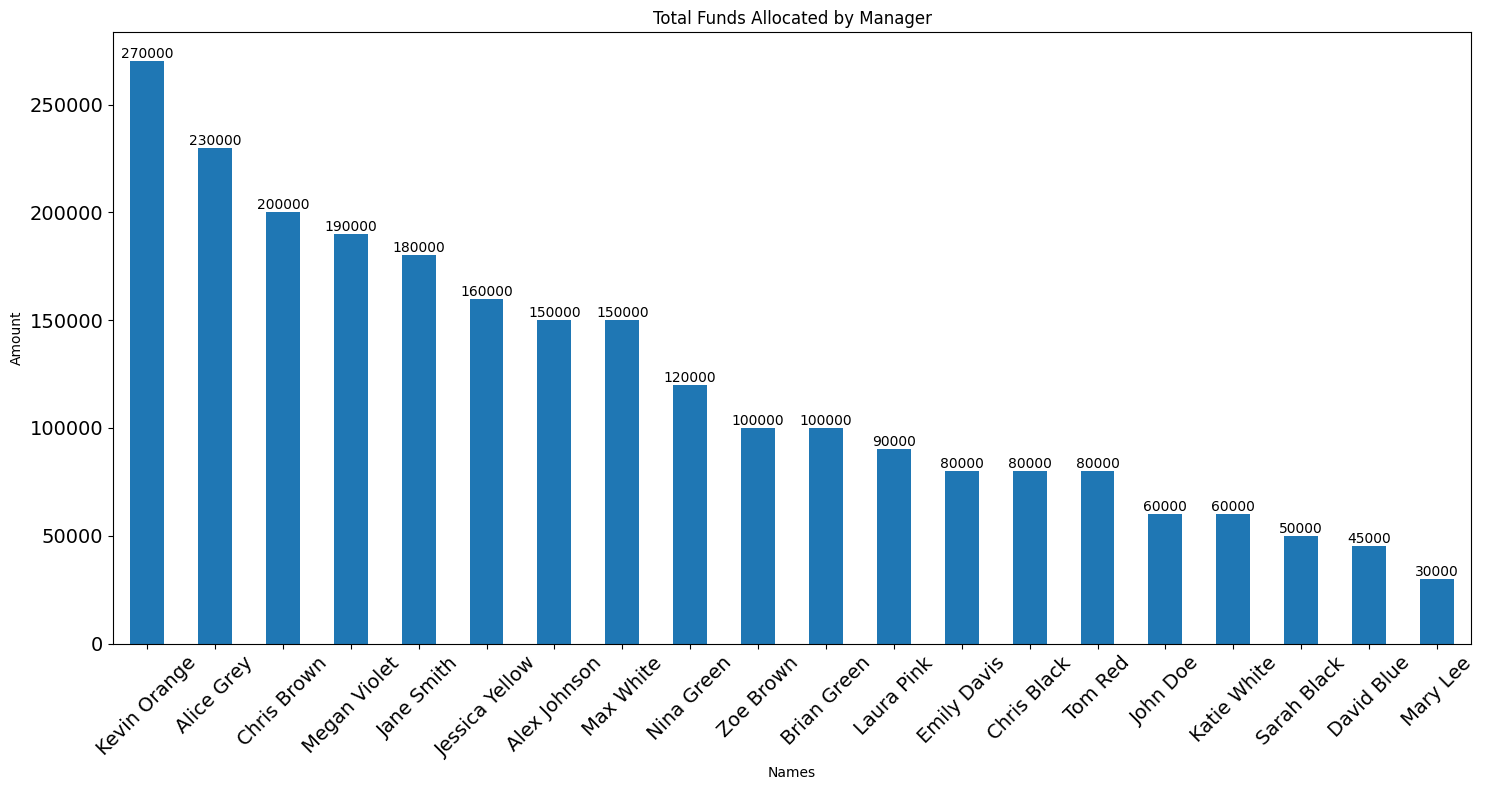

In [63]:
# How much total funds have been allocated for each manager in the Manager_Name column?
manager_funds = df.groupby('Manager_Name')['Funds_Allocated'].sum().sort_values(ascending=False)

ax = manager_funds.plot.bar(x='Manager_Name', y='Funds_Allocated', 
            figsize=(15, 8),
            title='Total Funds Allocated by Manager',
            xlabel='Names',
            ylabel='Amount',
            rot=45,
            fontsize=14,
            legend=False
            )

#annotate bars
ax.bar_label(ax.containers[0])

# Show the plot
plt.tight_layout()
plt.show()

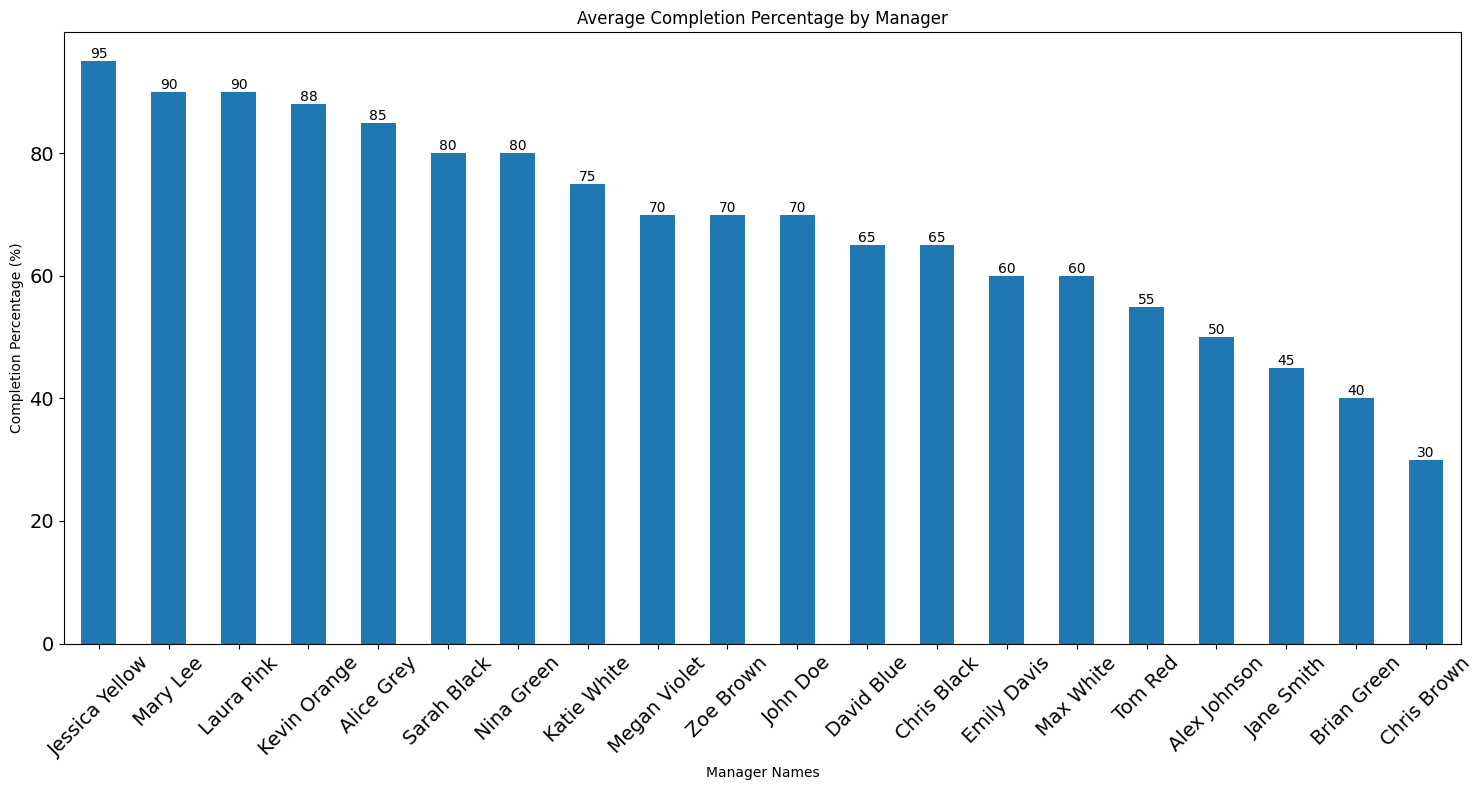

In [70]:
# What is the average completion percentage for grants managed by each manager?
average_completion = df.groupby('Manager_Name')['Completion_Percentage'].mean().sort_values(ascending=False)

ax = average_completion.plot.bar(
    figsize=(15, 8),
    title='Average Completion Percentage by Manager',
    xlabel='Manager Names',
    ylabel='Completion Percentage (%)',
    rot=45,
    fontsize=14,
    legend=False
)

#annotate bars
ax.bar_label(ax.containers[0])

# Show the plot
plt.tight_layout()
plt.show()

 # Date Analysis

In [81]:
# What is the average duration of the grants (from Start_Date to End_Date)?

# Convert Start_Date and End_Date to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])


# Calculate the duration in days
df['Duration_In_Days'] = (df['End_Date'] - df['Start_Date']).dt.days


# Calculate average duration
average_duration = df['Duration_In_Days'].mean()

print(f'Thee average duration of grants is {average_duration:.2f} days.')

Thee average duration of grants is 659.30 days.


In [97]:
# How many grants are currently active (i.e., where today's date is between Start_Date and End_Date)?

# Get today's date
today = pd.to_datetime('today')

# Dataframe of active grants
active_grants = df.loc[(df['Start_Date'] <= today) & (df['End_Date'] >= today)]

print(f"Active grants: {active_grants.shape[0]}")
active_grants

Active grants: 13


,Grant_ID,Project_Name,Grant_Amount,Funds_Allocated,Start_Date,End_Date,Completion_Percentage,Key_Deliverables,Success_Rate (%),Manager_Name,Duration_In_Days
1,2,Renewable Energy Initiative,250000.0,180000.0,2022-05-01,2025-05-01,45.0,Solar panel installations,60.0,Jane Smith,1096
5,6,Rural Healthcare Expansion,300000.0,200000.0,2023-04-01,2025-04-01,30.0,Mobile health clinics,50.0,Chris Brown,731
8,9,Small Business Development Fund,75000.0,50000.0,2023-05-01,2024-12-01,80.0,Business mentorship programs,75.0,Sarah Black,580
9,10,Mental Health Awareness Campaign,90000.0,45000.0,2023-06-01,2024-10-01,65.0,Mental health support groups,80.0,David Blue,488
10,11,Affordable Housing Project,250000.0,230000.0,2022-11-01,2025-01-01,85.0,Housing construction,90.0,Alice Grey,792
12,13,Environmental Conservation Initiative,170000.0,160000.0,2022-08-01,2024-11-01,95.0,Tree planting campaigns,95.0,Jessica Yellow,823
13,14,Women in STEM Education,110000.0,90000.0,2023-07-01,2025-06-01,90.0,STEM training for girls,85.0,Laura Pink,701
14,15,Renewable Resources Research,300000.0,270000.0,2023-09-01,2025-03-01,88.0,Research on renewable resources,88.0,Kevin Orange,547
15,16,Disaster Preparedness Training,220000.0,190000.0,2022-04-01,2025-01-01,70.0,Training for disaster response,75.0,Megan Violet,1006
16,17,Public Transportation Improvement,160000.0,80000.0,2022-03-01,2025-02-01,65.0,Public transit route enhancements,60.0,Chris Black,1068


# Correlation

In [110]:
#  Is there a correlation between Grant_Amount, Funds_Allocated, and Success_Rate (%)?
correlation = df[['Grant_Amount', 'Funds_Allocated', 'Success_Rate (%)']]
correlation.corr()

,Grant_Amount,Funds_Allocated,Success_Rate (%)
Grant_Amount,1.00000,0.89794,-0.32754
Funds_Allocated,0.89794,1.00000,-0.12234
Success_Rate (%),-0.32754,-0.12234,1.00000


In [115]:
# Does the amount of funds allocated correlate with the completion percentage and success rate?
correlation_success_rate = df['Funds_Allocated'].corr(df['Completion_Percentage'])
correlation_completion = df['Funds_Allocated'].corr(df['Success_Rate (%)'])

print(f'Correlation between Funds Allocated and Completion Percentage: {correlation_success_rate:.2f}')
print(f'Correlation between Funds Allocated and Success_Rate: {correlation_completion:.2f}')


Correlation between Funds Allocated and Completion Percentage: -0.06
Correlation between Funds Allocated and Success_Rate: -0.12


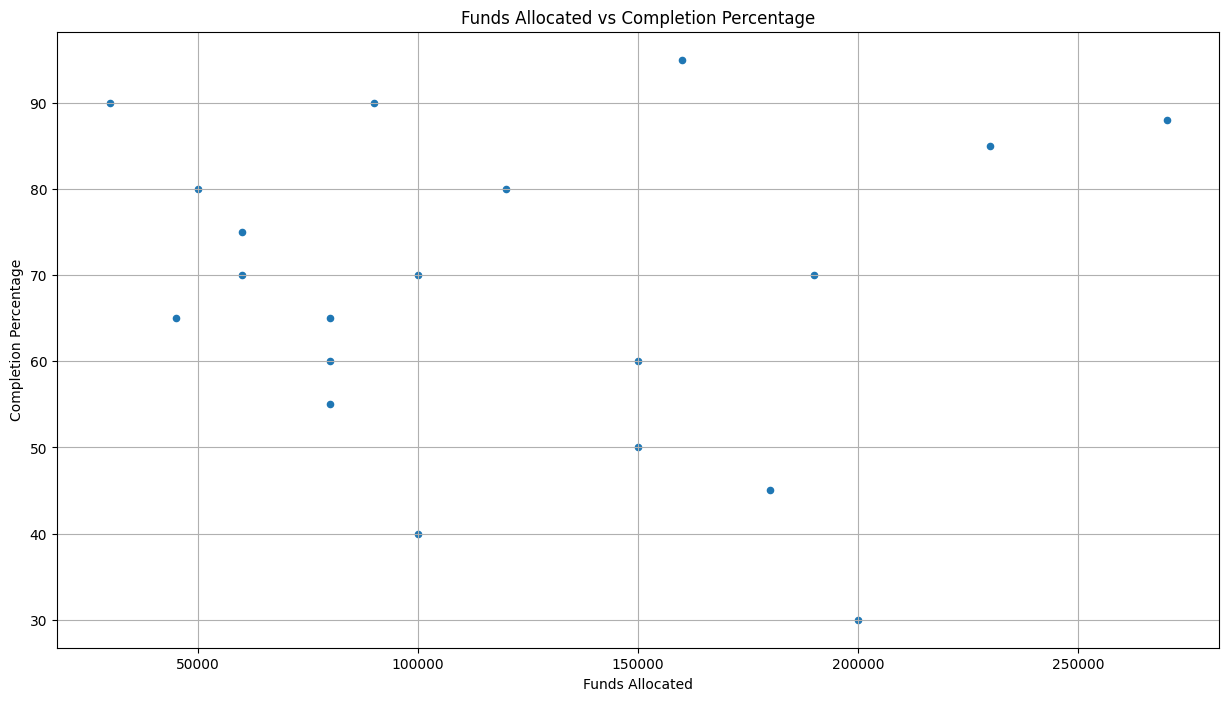

In [129]:
# Scatter plot for Funds Allocated vs Completion Percentage
ax = df.plot.scatter(x='Funds_Allocated', y='Completion_Percentage',
                figsize=(15, 8),
                title='Funds Allocated vs Completion Percentage',
                xlabel='Funds Allocated', 
                ylabel='Completion Percentage',
                grid=True
)

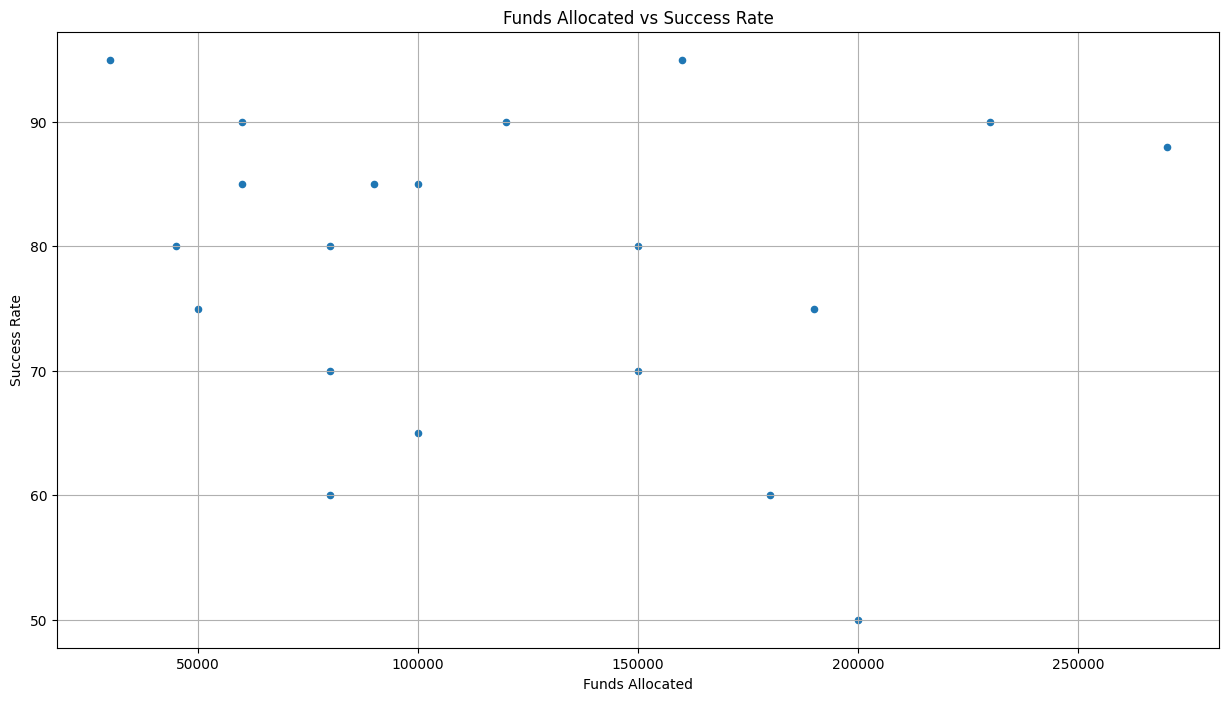

In [130]:
# Scatter plot for Funds Allocated vs Success Rate
ax = df.plot.scatter(x='Funds_Allocated', y='Success_Rate (%)',
                figsize=(15, 8),
                title='Funds Allocated vs Success Rate',
                xlabel='Funds Allocated', 
                ylabel='Success Rate',
                grid=True
)